In [ ]:
import pandas as pd

# Load the preprocessed dataset
data = pd.read_csv('/content/final_data.csv')

# Display the first few rows to verify
print(data.head())


   SUBJECT_ID  HADM_ID                  ADMITTIME                  DISCHTIME  \
0       10510   181373  2201-03-31 17:54:00+00:00  2201-04-02 16:56:00+00:00   
1       10510   181373  2201-03-31 17:54:00+00:00  2201-04-02 16:56:00+00:00   
2       10510   181373  2201-03-31 17:54:00+00:00  2201-04-02 16:56:00+00:00   
3       10510   181373  2201-03-31 17:54:00+00:00  2201-04-02 16:56:00+00:00   
4       10510   178851  2201-01-30 11:00:00+00:00  2201-02-03 16:48:00+00:00   

  GENDER  AGE  MORTALITY  MEDICAL_HISTORY_FLAG  SAPS_SCORE  SOFA_SCORE  ...  \
0      M   18          0                     0         0.0         0.0  ...   
1      M   18          0                     0         0.0         0.0  ...   
2      M   18          0                     0         0.0         0.0  ...   
3      M   18          0                     0         0.0         0.0  ...   
4      M   18          0                     0         0.0         0.0  ...   

   tempc_max  tempc_min  tempc_mean  MEAN_LA

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data.drop(columns=['MORTALITY'])  # Drop the target variable
y = data['MORTALITY']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (68443, 29), Testing set: (29333, 29)


In [ ]:
# Convert ADMITTIME and DISCHTIME to datetime
data['ADMITTIME'] = pd.to_datetime(data['ADMITTIME'])
data['DISCHTIME'] = pd.to_datetime(data['DISCHTIME'])



# Encode categorical variables
if 'GENDER' in data.columns:
    label_encoder = LabelEncoder()
    data['GENDER'] = label_encoder.fit_transform(data['GENDER'])  # Male = 1, Female = 0

# Check for and handle missing values
data.fillna(data.mean(), inplace=True)

# Drop original datetime columns as they're no longer needed
data.drop(columns=['ADMITTIME', 'DISCHTIME'], inplace=True)

In [ ]:
# Split features and target
X = data.drop(columns=['MORTALITY'])  # Features
y = data['MORTALITY']  # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (68443, 27), Testing set: (29333, 27)


In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'k-NN': KNeighborsClassifier(n_neighbors=5),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Bagging': BaggingClassifier(random_state=42)
}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: AUC = 0.793
Decision Tree: AUC = 0.897
Random Forest: AUC = 0.981
k-NN: AUC = 0.852


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:35:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost: AUC = 0.956
Bagging: AUC = 0.963


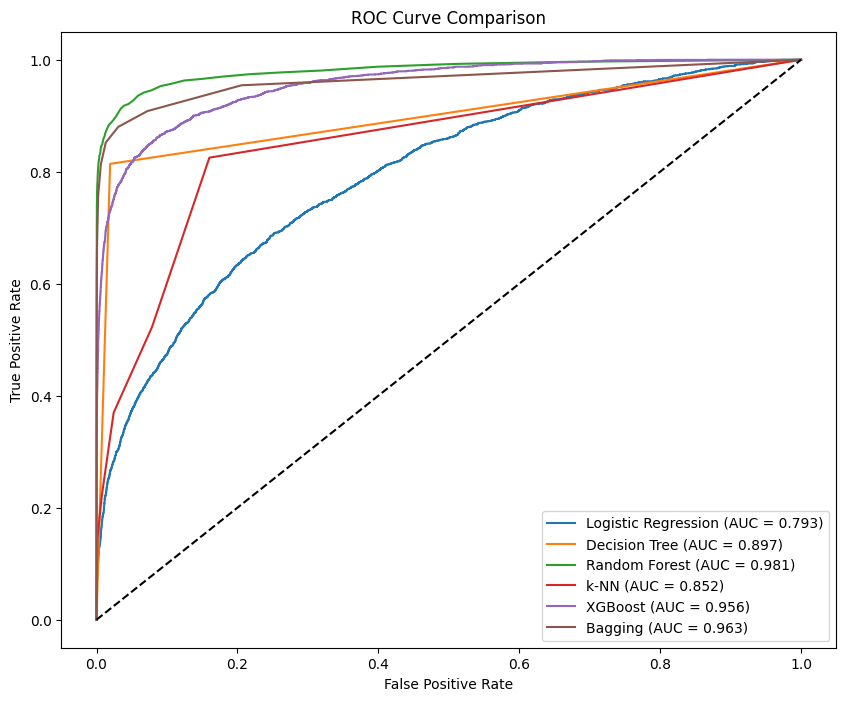

In [ ]:
# Train and evaluate models
results = {}
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability scores for the positive class
    auc = roc_auc_score(y_test, y_pred_proba)
    results[model_name] = auc
    print(f"{model_name}: AUC = {auc:.3f}")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.3f})")

# Add diagonal line and labels
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

Imoroved AUC score using hyper parameters

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize base models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'k-NN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Bagging': BaggingClassifier(random_state=42)
}

# Perform hyperparameter tuning for Logistic Regression
log_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga']
}
log_reg = GridSearchCV(
    LogisticRegression(max_iter=2000, random_state=42),
    param_grid=log_reg_param_grid,
    cv=5,
    scoring='roc_auc'
)
log_reg.fit(X_train, y_train)
print(f"Best Logistic Regression AUC: {log_reg.best_score_}")
print(f"Best Parameters for Logistic Regression: {log_reg.best_params_}")
models['Logistic Regression'] = log_reg.best_estimator_

# Perform hyperparameter tuning for k-NN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=knn_param_grid,
    cv=5,
    scoring='roc_auc'
)
knn.fit(X_train, y_train)
print(f"Best k-NN AUC: {knn.best_score_}")
print(f"Best Parameters for k-NN: {knn.best_params_}")
models['k-NN'] = knn.best_estimator_

# Train and evaluate models with tuned hyperparameters
results = {}
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability scores for the positive class
    auc = roc_auc_score(y_test, y_pred_proba)
    results[model_name] = auc
    print(f"{model_name}: AUC = {auc:.3f}")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.3f})")

# Add diagonal line and labels
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


Top 5 Predictors from SHAP:
           Feature  Mean SHAP Value
22     MAX_LACTATE         0.623502
7      OASIS_SCORE         0.531097
26  LENGTH_OF_STAY         0.423045
23         MEAN_PH         0.401422
5       SAPS_SCORE         0.376482


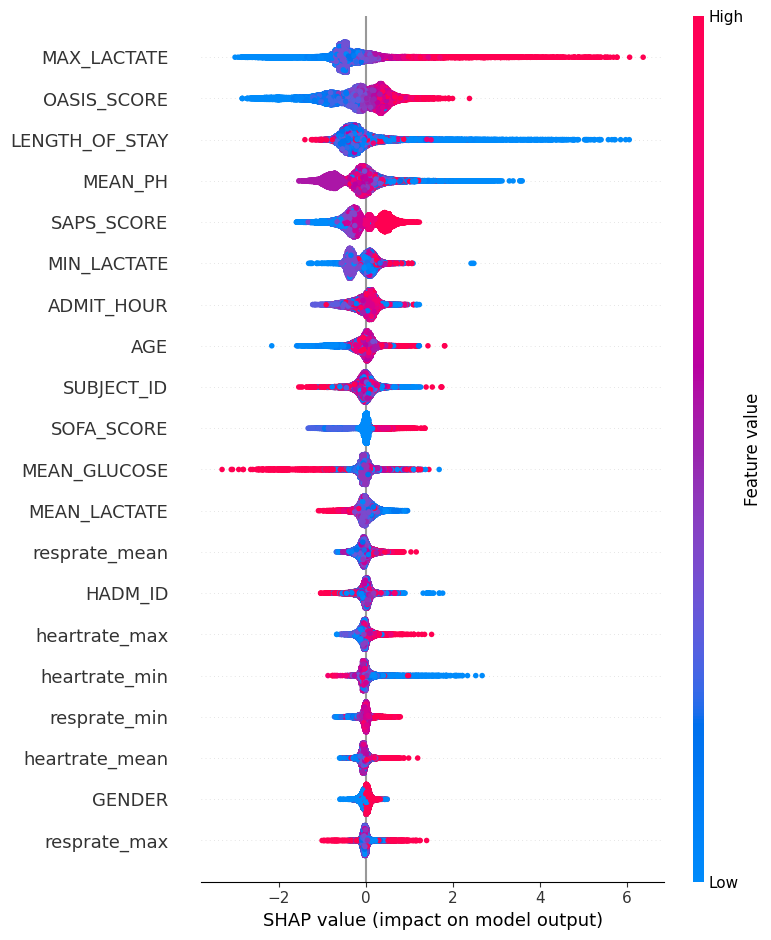

In [ ]:
import shap
import pandas as pd
import numpy as np

# Ensure the X_test is compatible with XGBoost and SHAP
X_test_array = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test

# Re-train the XGBoost model with DMatrix to ensure compatibility
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test_array, label=y_test)

# Train the model using DMatrix
xgb_model = xgb.train(
    params={
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "max_depth": 6,
        "eta": 0.3,
        "random_state": 42,
    },
    dtrain=dtrain,
    num_boost_round=100
)

# Use SHAP to calculate feature importances
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer(dtest)  # Use dtest directly

# Summarize SHAP values to get mean importance
shap_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Mean SHAP Value': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='Mean SHAP Value', ascending=False)

# Display top 5 predictors
print("Top 5 Predictors from SHAP:")
print(shap_importance.head())

# Visualize SHAP Summary Plot
shap.summary_plot(shap_values.values, X_test_array, feature_names=X_train.columns)


In [ ]:
import numpy as np

# Assuming Random Forest and XGBoost are already trained
xgb_model = models['XGBoost']
# Get feature importance from XGBoost
xgb_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top 5 predictors for XGBoost model
print("\nTop 5 Predictors from XGBoost:")
print(xgb_feature_importance.head())



Top 5 Predictors from XGBoost:
         Feature  Importance
5     SAPS_SCORE    0.187791
27    DISCH_HOUR    0.133229
22   MAX_LACTATE    0.065461
7    OASIS_SCORE    0.064117
20  MEAN_LACTATE    0.053509


Logistic Regression Brier Score: 0.054
Decision Tree Brier Score: 0.032
Random Forest Brier Score: 0.019
k-NN Brier Score: 0.029
XGBoost Brier Score: 0.015
Bagging Brier Score: 0.019


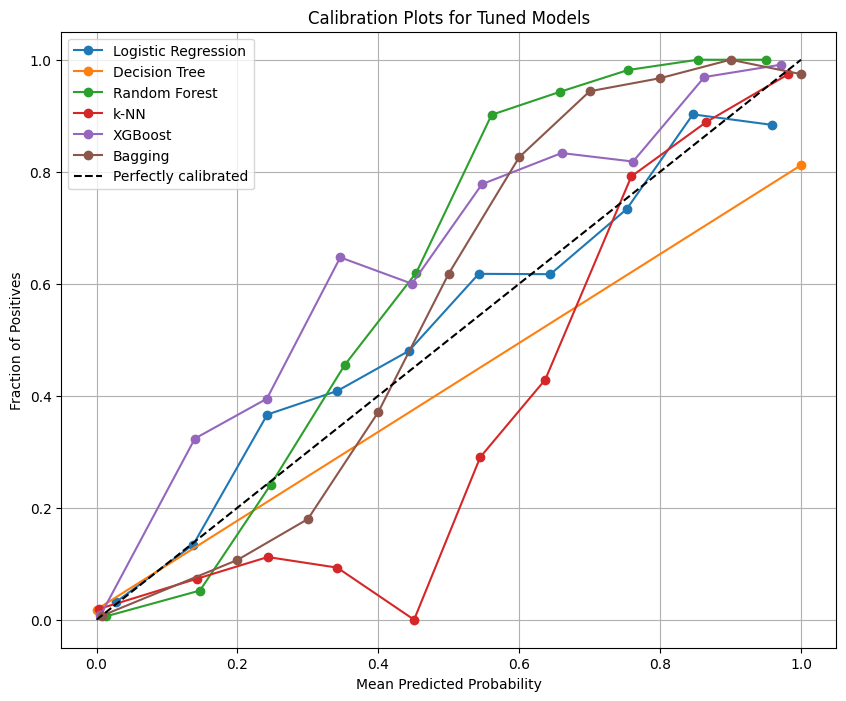

In [ ]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt

# Generate calibration plots for all models
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    # Predict probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate calibration curve
    prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10, strategy='uniform')

    # Plot calibration curve
    plt.plot(prob_pred, prob_true, marker='o', label=f"{model_name}")

    # Calculate and print Brier score for each model
    brier = brier_score_loss(y_test, y_pred_proba)
    print(f"{model_name} Brier Score: {brier:.3f}")

# Add a reference line for perfect calibration
plt.plot([0, 1], [0, 1], "k--", label="Perfectly calibrated")

# Set plot labels and legend
plt.title('Calibration Plots for Tuned Models')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend(loc='best')
plt.grid()
plt.show()